In [2]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as mpl
from pandas_datareader import data as wb

In [3]:
df_pg_1 = pd.read_csv("../files/data_historical_PG.csv", decimal=',', thousands='M')
df_pg_2 = pd.read_csv("../files/data_historical_PG_2.csv", decimal=',', thousands='M')

df_pg = pd.concat([df_pg_1, df_pg_2])


In [4]:
# transform the data to correct dtype
df_pg['Fecha'] = pd.to_datetime(df_pg['Fecha'], format="%d.%m.%Y")
df_pg['Último'] = df_pg['Último'].astype(float)
df_pg['Apertura'] = df_pg['Apertura'].astype(float)
df_pg['Máximo'] = df_pg['Máximo'].astype(float)
df_pg['Mínimo'] = df_pg['Mínimo'].astype(float)


In [5]:
df_pg = df_pg.set_index('Fecha')

In [6]:
df_pg.head()

,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
1995-01-03,15.47,15.35,15.51,15.32,"3,32M","0,59%"
1995-01-04,15.35,15.41,15.54,15.20,"2,22M","-0,78%"
1995-01-05,15.13,15.26,15.32,15.10,"2,32M","-1,43%"
1995-01-06,15.16,15.04,15.29,15.04,"3,44M","0,20%"
1995-01-09,15.10,15.23,15.29,15.07,"1,80M","-0,40%"


In [7]:
df_pg.tail()

,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
2025-03-20,167.55,168.89,169.21,166.03,"8,79M","-0,61%"
2025-03-21,166.69,167.14,168.14,164.12,"16,03M","-0,51%"
2025-03-24,165.65,166.43,166.87,165.36,"6,10M","-0,62%"
2025-03-25,162.85,163.12,165.37,162.20,"8,37M","-1,69%"
2025-03-26,165.69,163.30,165.84,163.00,"2,68M","1,74%"


## Log Return

ln(Pt / Pt - 1)

In [8]:
df_pg['log_return'] = np.log(df_pg['Último'] / df_pg['Último'].shift(1))
print(df_pg['log_return'])

Fecha
1995-01-03         NaN
1995-01-04   -0.007787
1995-01-05   -0.014436
1995-01-06    0.001981
1995-01-09   -0.003966
                ...   
2025-03-20   -0.006069
2025-03-21   -0.005146
2025-03-24   -0.006259
2025-03-25   -0.017048
2025-03-26    0.017289
Name: log_return, Length: 7609, dtype: float64


<Axes: xlabel='Fecha'>

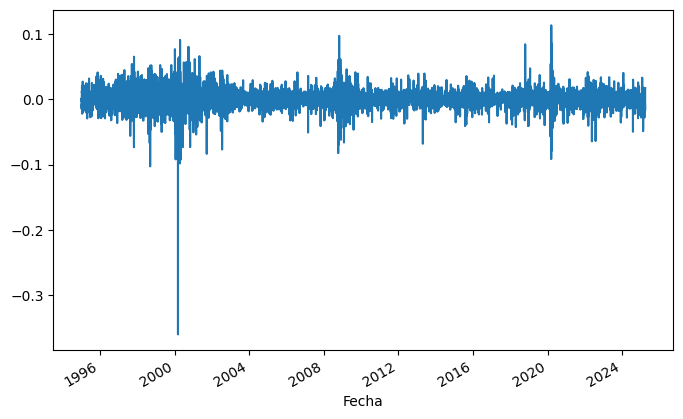

In [9]:
df_pg['log_return'].plot(figsize=(8,5))

In [10]:
 # Calculate the mean of log return
log_returns_d = df_pg['log_return'].mean()
log_returns_d

np.float64(0.0003116740152466132)

In [11]:
# Calculate the mean by days worked, the mean are 250 days, depends on the year
log_returns_a = df_pg['log_return'].mean() * 250
log_returns_a

np.float64(0.0779185038116533)

In [12]:
# Estimation the avg for PG
print(str(round(log_returns_a, 5) * 100) + ' %')

7.792000000000001 %
